# Lecture 14 (4/27/2022)

**Announcements**
- Lab 5 may take a little longer than previous labs
- Pset 3 due today
- Purva's OH in ERCA after lab today

*Last time we covered:*
- Linear regression basics (ordinary least squares)

**Today's agenda:**
- Evaluating linear regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Dive: regression in python

Last time, we talked about a number of different solutions for doing regression in python. 

The most popular option, and the one we'll focus on today, is the *scikit* `LinearRegression` [class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

\*Context: scikit is a robust set of tools for data science and analysis. Take a look at their other model-fitting resources [here](https://scikit-learn.org/stable/index.html).

In [2]:
mpg = sns.load_dataset('mpg')

mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<AxesSubplot:xlabel='weight', ylabel='horsepower'>

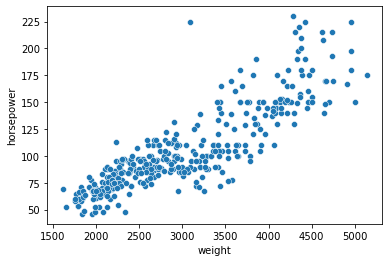

In [3]:
# Let's look at the data
# Is there a linear relationship between "weight" and "horsepower"?

sns.scatterplot(data = mpg,
                x = "weight",
                y = "horsepower"
               )

In [4]:
# Let's make sure this data is cleaned up by checking for null values!
# Handy resource: https://datatofish.com/rows-with-nan-pandas-dataframe/


mpg[mpg.isna().any(axis=1)]

# mpg.shape
# mpg.index

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [5]:
# Looks like we need to handle the null values above
mpg_clean = mpg.dropna().reset_index(drop = True)

mpg_clean[mpg_clean.isna().any(axis=1)]
# mpg.shape
# mpg.index

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [6]:
from sklearn.linear_model import LinearRegression # first, import the LinearRegression model class

# Prepare our data
x_vals = np.array(mpg_clean['weight'])
x_vals = x_vals.reshape(len(x_vals), 1) # what's going on here?
# x_vals[0]
# x_vals[0, 0]
# list(x_vals)
# x_vals
# TODO is there a more intuitive explanation for this?


y_vals = np.array(mpg_clean['horsepower'])


# Initialize the model
mod = LinearRegression()
# Fit the model
mod = mod.fit(X = x_vals, y = y_vals)

mod

LinearRegression()

Our (fitted) model comes with a number of *attributes*, including, most critically, the intercept and slope estimates

In [7]:
# Look at the values
mod.intercept_
# mod.coef_ # why is this different from the above?

# Other attributes we won't get into here

-12.1834847034594

Reminder: what do these values *actually mean?*

...

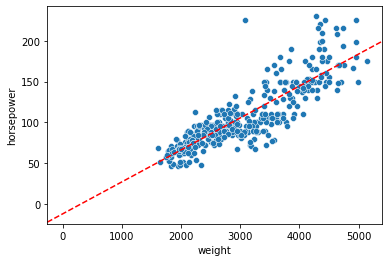

In [8]:
sns.scatterplot(data = mpg,
                x = "weight",
                y = "horsepower"
               )

plt.axline(xy1 = (0, mod.intercept_), slope = mod.coef_[0], color = "r", linestyle = "--")

### Your turn! 

Take a few minutes now to choose another pair of variables from this dataset. 

Plot them to see if they have a linear(ish) relationship, then fit a regression to them and examine the parameter estimates. 

NOTE: when doing this, try not to just copy-paste what I have above; instead, write it out yourself while looking back at the code when you need to. 

*Why?* Copy-pasting is a big part of coding, but it works better when you're already familiar with the syntax and just need the right details. When you're doing something for the first time, it's good to internalize what you're doing!

In [9]:
### YOUR CODE HERE




*What variables did you choose? How did your regression do?*
- weight / acceleration
- weight / mpg


***

Above we looked at some of the attributes of our model class. 

This class also has several useful *functions*. We've seen one already above (`fit()`).

What else can a LinearRegression object do?

In [10]:
# Other functions we can use

mod_preds = mod.predict(X = x_vals) # what is this doing?
# mod_preds

mod_score = mod.score(X = x_vals, y = y_vals) # what is this? 
mod_score

# These are the primary ones

0.74742549968982

# Evaluating linear regression

In the section above, we generated a regression for the relationship between `weight` and `horsepower`. 

How do we know if our regression is a good fit to the data? What gives you confidence that it's describing the relationship between the variables well?




## $R^2$ (coefficient of determination): how much variance are we explaining?


$ R^2 = 1 - \dfrac{RSS}{TSS} $

$ RSS = \sum_{i=1}^{n}{(y_i - \hat{y_i})}^2 $

*Where have we seen this before?*

$ TSS = \sum_{i=1}^{n}{(y_i - \bar{y})}^2 $

*What does this look like?*

$R^2$ ranges between 0 and 1 and can be thought of as the *percentage of variance in $y$ that our model explains*.

Intuition for this metric: divide the SS for our guess by the SS if our guess was just the mean of $y$.
- Raw value of RSS will vary depending on how many data points we have
- What's the lowest value that RSS could have? ...
- What's the *highest* value that RSS could have? ...


So our RSS should be somewhere between 0 (good) and whatever we would get from guessing $\bar{y}$ for every point (bad). Divide RSS by that worst case value to indicate how close we are to worst case, then subtract from 1 for how close we are to best case.

Here's a graphic illustrating it (source: wikipedia)

![rsq](img/rsq.png)

Let's calculate it by hand so we understand it better:

In [11]:
rsq_mod = mod.score(X = x_vals, y = y_vals) # R^2 value
rsq_mod

# Add predicted y values to dataframe
preds = mod.predict(X = x_vals)
mpg_clean = mpg_clean.assign(model_pred = pd.Series([x for x in preds]))
mpg_clean

# Calculate RSS based on predicted values
mpg_clean = mpg_clean.assign(resid_sum_sq = (mpg_clean['horsepower'] - mpg_clean['model_pred'])**2)

# Calculate TSS based on mean of y
ybar = mpg_clean['horsepower'].mean()
mpg_clean = mpg_clean.assign(total_sum_sq = (mpg_clean['horsepower'] - ybar)**2)

rsq_hand = 1 - mpg_clean['resid_sum_sq'].sum() / mpg_clean['total_sum_sq'].sum()
rsq_hand

# What is the R^2 value?
print("Model value: {}".format(rsq_mod))
print("Hand calculation: {}".format(rsq_hand))

Model value: 0.74742549968982
Hand calculation: 0.74742549968982


## Out of sample prediction (more on this later!)

Since the goal with our model is prediction, another way we can test whether it's doing a good job is to see how it predicts new data! 

There are a number of different approaches for this that we'll talk more about later. 

For now, let's demonstrate a simple one: *train* the model, then *test* on *hold-out data*.

**Step 1** is to randomly sample, e.g., 25% of our data and set it aside as the *test* data.

In [12]:
# Randomly sample 25% of our data points to be test data

from sklearn.model_selection import train_test_split

x_vals = np.array(mpg_clean['weight']).reshape(len(x_vals), 1)
y_vals = mpg_clean['horsepower']

xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, 
                                                test_size = 0.25, 
                                                random_state = 1
                                               )


# mpg_clean.shape
# len(xtrain)



**Step 2** is to fit our regression to the *training data only*.

In [13]:
# Initialize the model
mod_tr = LinearRegression()
# Fit the model
mod_tr = mod_tr.fit(X = xtrain, y = ytrain)

mod_tr.intercept_
mod_tr.coef_

array([0.03894649])

**Step 3** is to see how well our regression model performs on the *held out test data*

In [14]:
mod_preds = mod_tr.predict(X = xtest)

mod_preds


array([ 85.08612203,  72.03904762,  79.01046947,  99.18475168,
        65.18446525,  68.30018451,  72.74008445, 152.50249753,
        76.59578704,  76.67368002, 113.8675787 ,  70.98749237,
       137.0407407 ,  63.23714071,  85.82610535, 121.81266281,
        79.78939928,  78.42627211, 157.05923695, 100.97629026,
        74.96003443, 128.93987062, 119.86533828, 149.6983502 ,
       156.55293257, 140.93538978,  67.13178978, 129.67985395,
       105.8446016 ,  80.37359664, 120.87794704,  94.19960086,
       162.82331759,  97.89951749, 120.87794704, 151.64567474,
       134.89868371, 125.16206102,  64.01607052,  70.4422415 ,
       155.92978872, 158.26657817,  96.80901574, 100.46998588,
        96.10797891, 132.75662672, 182.10183051,  64.21080298,
       113.40022081, 171.89784993, 130.49773025, 110.36239453,
        91.78491844,  76.86841247,  59.34249163, 103.70254461,
        88.5523597 ,  88.24078778,  87.03344656,  57.58989955,
       104.90988582,  83.45036941,  64.40553543, 118.54

Text(0.5, 1.0, 'Regression performance on held out test data')

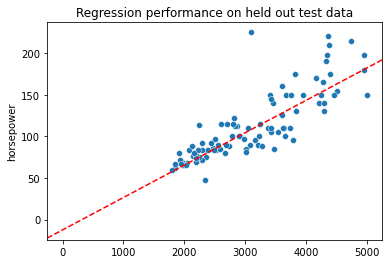

In [15]:
sns.scatterplot(x = xtest.reshape(len(xtest)),
                y = ytest
               )

plt.axline(xy1 = (0, mod_tr.intercept_), slope = mod_tr.coef_[0], color = "r", linestyle = "--")

plt.title("Regression performance on held out test data")

**Step 4** is ... 

... *now what?*

Let's compare how our model did on the testing data compared to the training data it was fit to.

There are lots of ways to do this (incl. the $R^2$ values we discussed above) and we'll spend more time looking at some of them next week.

But one commoon approach worth highlighting is the *mean squared error*.

Mean squared error (MSE) is just the *average* of the squared *residuals* or squared error, the same stuff we've been dealing with from the beginning. 

$ MSE = \dfrac{1}{n - 2} \sum_{i=1}^{n}{(y_i - \hat{y_i})}^2 = \dfrac{1}{n - 2} \sum_{i=1}^{n}{\epsilon_i}^2 $

This tells you, on average, how close your model was to the true value across all the data points.

*Why the $n - 2$ here?*

Let's calculate it for our train and test datasets and compare them.

*Do you think they'll be similar?*

In [16]:
# Training MSE

# Generate model predictions for the training data
train_pred = mod_tr.predict(X = xtrain)
# Calculate the squared error of these predictions
train_error = (ytrain - train_pred)**2
# Get the mean squared error
train_mse = train_error.sum() / (len(train_error) - 2)
train_mse

# Test MSE

# Generate model predictions for the test data (we did this above already)
test_pred = mod_tr.predict(X = xtest)
# Calculate the squared error of the test predictions
test_error = (ytest - test_pred)**2
# Get the mean squared error for test data
test_mse = test_error.sum() / (len(test_error) - 2)
test_mse

print("Training MSE: {} \n Test MSE: {}".format(train_mse, test_mse))

Training MSE: 332.72896851897474 
 Test MSE: 516.4390434210967


*What do these results mean?*

*Is this a pretty good regression fit?*

...

## Parameter estimates

The criteria above are mostly concerned with whether we're doing *a good job predicting our $y$ values* with this model.

Notice this completely ignores the actual parameter estimates of the model! 

In many cases, part of what we're concerned with isn't just how well we predict our data, but what kind of relationship our model estimates between $x$ and $y$. 
- How large or small is the slope?
- How confident are we in the estimate?

This isn't data we get directly from the `LinearRegression` class.

Instead, we can calculate by hand or use another model class like the `statsmodels` class we saw on Monday. 

In [17]:
import statsmodels.formula.api as smf

results = smf.ols('horsepower ~ weight', data = mpg_clean).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.36e-118
Time:                        18:22:11   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1835      3.570     -3.412      0.001     -19.203      -5.164
weight         0.0392      0.001     33.972      0.000       0.037       0.041
==============================================================================
Omnibus:                       83.255   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.937
Skew:                           0.892   Prob(JB):                     1.11e-68
Kurtosis:                       6.997   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**What do we learn from the above?**

Understanding the full output requires a more extensive statistics discussion than we're going to have, but there are a few important take-aways:
1. The coefficient for `weight` (0.0392) has a small standard error (0.001) and a very narrow 95% confidence interval (0.037, 0.041) based on the observations here. This means we're pretty certain about this slope estimate.

2. The $t$ value for the slope (33.97) is extremely large, meaning we're very confident that this slope value is significantly different from 0. In other words, *there is a significant relationship between weight and horsepower in this data*.

This is another way that we can evaluate our regression: the parameter estimates themselves tell us something useful and reasonably precise about the unerlying data.

# Regression failures

Above we went through how to interpret and evaluate our regression. 

In this case, we were estimating a linear slope in data that had a pretty strong linear relationship.

*But what are the ways that this can break down?*

...

### Noisy data

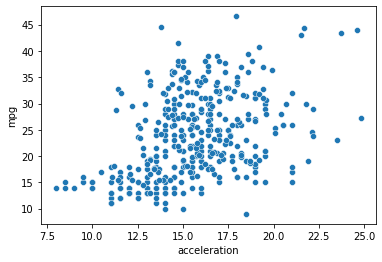

In [18]:
# mean = [0, 0]
# cov = [[1, 0], [0, 1]]
# x, y = np.random.multivariate_normal(mean, cov, 100).T


g = sns.scatterplot(data = mpg_clean, x = "acceleration", y = "mpg")




In [19]:
# Can we fit a regression to the data above?

m = LinearRegression().fit(
    X = np.array(mpg_clean['acceleration']).reshape(len(mpg_clean['acceleration']), 1), 
    y = np.array(mpg_clean['mpg'])
)

m.intercept_
m.coef_

m.score(
    X = np.array(mpg_clean['acceleration']).reshape(len(mpg_clean['acceleration']), 1), 
    y = np.array(mpg_clean['mpg'])
) 
# not so great...

0.1792070501562546

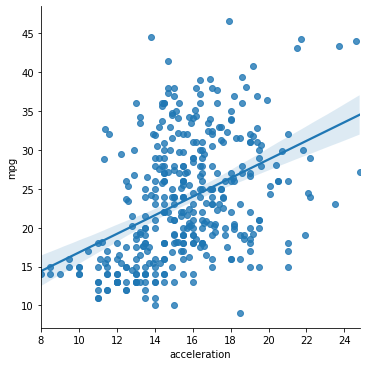

In [20]:
sns.lmplot(data = mpg_clean, x = "acceleration", y = "mpg")

### Non-linear data

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

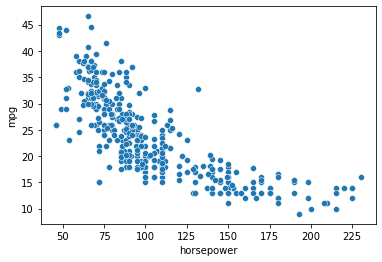

In [21]:
# This doesn't seem like a linear relationship...

sns.scatterplot(data = mpg_clean, x = "horsepower", y = "mpg") # hp


In [22]:
# Can we fit a regression to the data above?

m = LinearRegression().fit(
    X = np.array(mpg_clean['horsepower']).reshape(len(mpg_clean['horsepower']), 1), 
    y = np.array(mpg_clean['mpg'])
)

m.intercept_
m.coef_

m.score(
    X = np.array(mpg_clean['horsepower']).reshape(len(mpg_clean['horsepower']), 1), 
    y = np.array(mpg_clean['mpg'])
)

0.6059482578894348

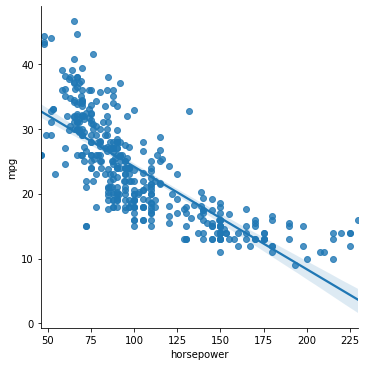

In [23]:
sns.lmplot(data = mpg_clean, x = "horsepower", y = "mpg")

This graphic shows the correlation coefficient between two variables for a range of different data patterns. 

The data that doesn't have a strong correlation is also going to be difficult to fit a linear regression to.

![corr_ex](img/corr_ex.png)

### Multiple predictors

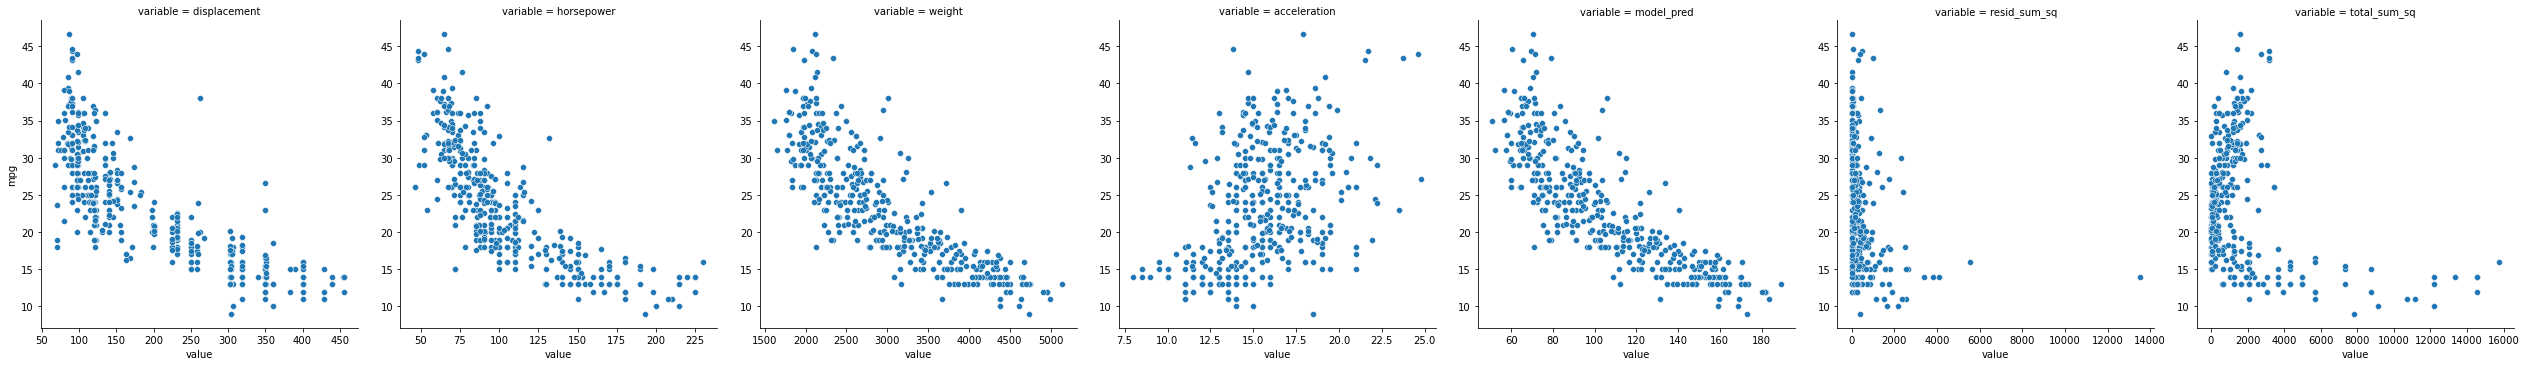

In [24]:
mpg_clean

mpg_long = mpg_clean.melt(
    id_vars = ["name", "origin", "model_year", "cylinders", "mpg"]
)
mpg_long

sns.relplot(data = mpg_long,
            x = "value",
            y = "mpg",
            col = "variable",
            kind = "scatter",
            facet_kws={'sharey': False, 'sharex': False}
           )


### [next time] Failures of the linear regression assumptions
- Ex. non-normal residuals